### General
Visualization of master stability function. Details in Section 4 and Appendix C of the paper.

In [1]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def find_roots(a,b,c,d):
    """""a,b,c,d are the coefficients of the polynomial"""""

    x = sp.symbols('x')
    roots = sp.solve(a*x**3 + b*x**2 + c*x + d, x)
    real_roots = []
    for x in roots:
        if abs(sp.im(x).evalf()) < 10**(-15):
            x = sp.re(x)
        if x.is_real:
            x = float(x)
            real_roots.append(x)
    return real_roots

# Define the single patch Jacobian P
P_11 = lambda x,y,alpha,gamma: -gamma*y**2 + 2*gamma*x*y - alpha
P_12 = lambda x,y,beta,gamma: gamma*x**2 - 2*gamma*x*y + beta
P_21 = lambda x,y,alpha,gamma: gamma*y**2 - 2*gamma*x*y + alpha
P_22 = lambda x,y,beta,gamma: -gamma*x**2 + 2*gamma*x*y - beta

In [3]:
# Define parameters
M = 15
root_num = 0 # if bi-stable region, at which root of x do we evaluate the MSF
kappa_vals = np.linspace(-1.5,1,1000) # range of laplacian eigenvalues

alpha_vals = [0.6, 0.6, 0.55, 0.3]
beta_vals  = [0.6, 0.6, 0.6, 0.6]
gamma_vals = [0.005, 0.005, 0.01, 0.02]
mu_x_vals  = [1, 5, 5, 15]
mu_y_vals  = [1, 1, 1, 1]

In [4]:
real_eigvals = []
im_eigvals = []
intersect = []

for alpha, beta, gamma, mu_x, mu_y in zip(alpha_vals, beta_vals, gamma_vals, mu_x_vals, mu_y_vals):
    # find roots of the single patch system
    a_ = -2*gamma
    b_ = (gamma*M+2*gamma*M)
    c_ = (-alpha-beta-gamma*M**2)
    d_ = beta*M
    roots = find_roots(a_,b_,c_,d_)
    root_x = roots[root_num]
    root_y = M-roots[root_num]

    # find leading eigenvalues for each kappa
    leading_eigv = []
    eig_vals = []
    for kappa_ in kappa_vals:
        # Equation 4 from the paper
        MSF = np.array([[P_11(root_x, root_y, alpha, gamma) - kappa_*mu_x, P_12(root_x, root_y, beta, gamma)], 
                      [P_21(root_x, root_y, alpha, gamma), P_22(root_x, root_y, beta, gamma) - kappa_*mu_y]])
        eigenvalues = np.linalg.eigvals(MSF)
        leading_eigv.append(max(eigenvalues.real))
        eig_vals.append(eigenvalues)
    # Equation 10 in the paper
    intersect.append((P_11(root_x,root_y,alpha,gamma)/mu_x) + (P_22(root_x, root_y, beta, gamma)/mu_y))
    real_eigvals.append(np.real(eig_vals))
    im_eigvals.append(np.imag(eig_vals))

Text(0.05, 0.55, '$m(\\kappa)$')

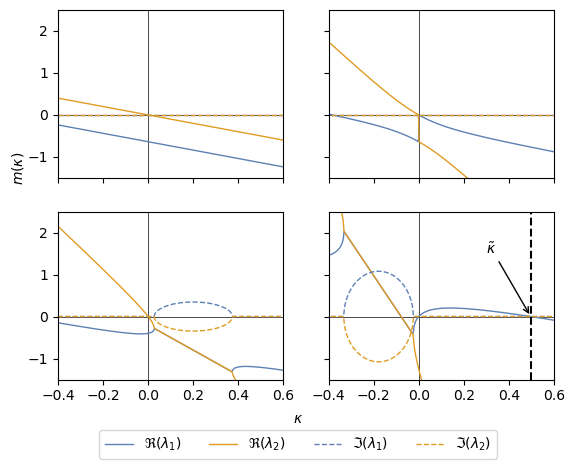

In [5]:
xlim = [-0.4,0.6]
ylim = [-1.5,2.5]
idx = 0

fig, ax = plt.subplots(2,2, sharey=True, sharex=True)

for i in [0,1]:
    for e in [0,1]:
        ax[i,e].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
        ax[i,e].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        p1=ax[i,e].plot(kappa_vals, real_eigvals[idx][:,1], "-", label=r'$\Re(\lambda_1)$', color="#5d81b4", linewidth=1)
        p2=ax[i,e].plot(kappa_vals, real_eigvals[idx][:,0], "-", label=r'$\Re(\lambda_2)$', color="#e09b24", linewidth=1)
        p3=ax[i,e].plot(kappa_vals, im_eigvals[idx][:,0], "--", label=r'$\Im(\lambda_1)$', color="#5d81b4", linewidth=1)
        p4=ax[i,e].plot(kappa_vals, im_eigvals[idx][:,1], "--", label=r'$\Im(\lambda_2)$', color="#e09b24", linewidth=1)
        ax[i,e].set_xlim(xlim)
        ax[i,e].set_ylim(ylim)
        idx += 1

ax[1, 1].axvline(x=intersect[-1], color='black', linestyle='--')
ax[1, 1].annotate(r'$\tilde{\kappa}$', xy=(intersect[-1], 0), xytext=(0.3, 1.5), 
                  arrowprops=dict(arrowstyle='->', color='black'), color='black')

for a in ax.flat:
    a.minorticks_off()

handles = [p1[0], p2[0], p3[0], p4[0]] 
labels = [r'$\Re(\lambda_1)$', r'$\Re(\lambda_2)$', r'$\Im(\lambda_1)$', r'$\Im(\lambda_2)$']
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.07))

fig.text(0.5, 0.02, r'$\kappa$', ha='center')
fig.text(0.05, 0.55, r'$m(\kappa)$', va='center', rotation='vertical')